In [1]:
import networkx as nx
import itertools as it
import numpy as np
import matplotlib.pyplot as plt
import random as rand
# import scipy.special
import igraph as ig
import time 
import math
from AuxTool import *
from NodeRel import *
rand.seed(11)

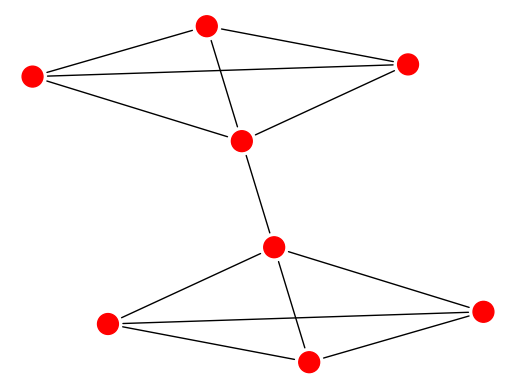

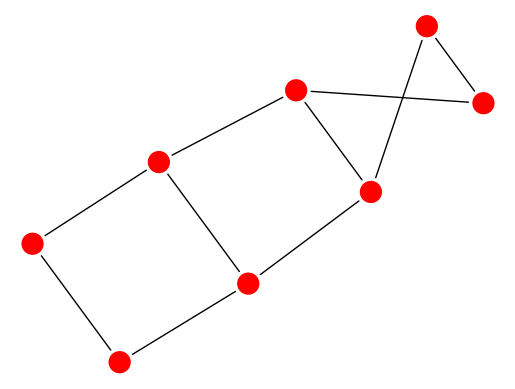

In [2]:
N = 4
G = ig.disjoint_union([ig.Graph.Full(N),ig.Graph.Full(N)])
G.add_edge(0,N)
quickplot(G)

H = ig.disjoint_union([ig.Graph.Tree(N,1),ig.Graph.Tree(N,1)])
for i in range(N):
    H.add_edge(i,i+N)
quickplot(H)

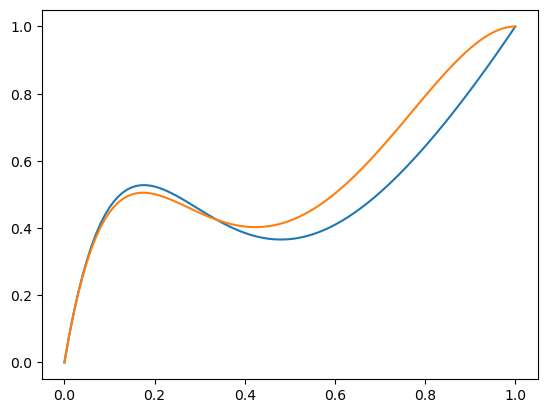

In [3]:
plt.figure()
seq1 = coeff2nppoly(nRelpoly(G), pltpoly = True, x=np.linspace(0,1,101))
seq2 = coeff2nppoly(nRelpoly(H), pltpoly = True, x=np.linspace(0,1,101))
plt.show()

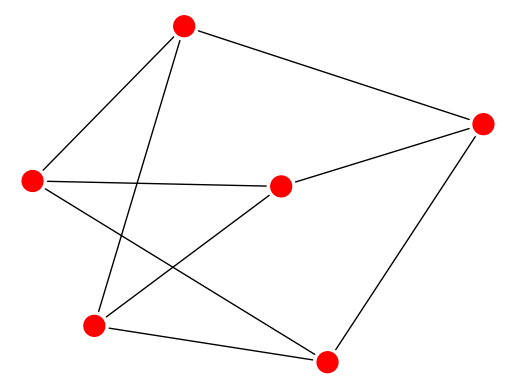

In [4]:
abc = quickplot(ig.Graph.Full_Bipartite(3,3))

In [12]:
family = {}
p = np.linspace(0,1,101)
name = "{}n{}l"
files = {"2":"GraphSetsAdj/4_nodes_4_links_2_graphs.txt",
         "3":"GraphSetsAdj/6_nodes_9_links_20_graphs.txt",
         "4":"GraphSetsAdj/8_nodes_16_links_1290_graphs.txt",
         "5":"GraphSetsAdj/10_nodes_25_links_1057896_graphs.txt",
        }
Knn = {}
for n in range(2,6):
    family[name.format(n*2,n**2)] = GraphClass(n,n**2)
    family[name.format(n*2,n**2)].attach(files[str(n)])
    family[name.format(n*2,n**2)].load()
    Knn[str(n)] = coeff2nppoly(nRelpoly(ig.Graph.Full_Bipartite(n,n)), pltpoly = False, x=p)

In [13]:
for n in range(2,6):
    # plt.figure()
    pn = Knn[str(n)]
    # plt.plot(p,pn(p))
    for poly in family[name.format(n*2,n**2)].Gpoly:
        if any(i<0 for i in (pn-poly)(p)):
            print(poly,'\n')
        # plt.plot(p,pn(p))
        # plt.plot(p,poly(p))
        # plt.show()